#Bollywood FaceMatch Analyzer


In [3]:
!pip install face_recognition

In [2]:
!pip install opencv-python
!pip install opencv-python-headless

In [6]:
import zipfile
import os
# Path to the uploaded zip file
zip_file_path = '/content/Bolly_data.zip'  # Update this with your zip file name

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Verify the extraction
print("Contents of extracted folder:", os.listdir('/content'))

Contents of extracted folder: ['.config', 'data', 'kaggle.json', 'Bolly_data.zip', 'sample_data']


In [7]:
actors = os.listdir('data')
print(actors)

['Shruti_Haasan', 'Ranveer_Singh', 'Deepika_Padukone', 'Arjun_Rampal', 'Abhishek_Bachchan', 'Tusshar_Kapoor', 'Kriti_Sanon', 'Kartik_Aaryan', 'Riteish_Deshmukh', 'Kajal_Aggarwal', 'Amitabh_Bachchan', 'Bobby_Deol', 'Alia_Bhatt', 'Juhi_Chawla', 'Ileana_DCruz', 'Uday_Chopra', 'Pooja_Hegde', 'Shreyas_Talpade', 'Kriti_Kharbanda', 'Hrithik_Roshan', 'Shah_Rukh_Khan', 'Ameesha_Patel', 'Yami_Gautam', 'Madhuri_Dixit', 'Richa_Chadda', 'Rajkummar_Rao', 'Amrita_Rao', 'Prabhas', 'Shraddha_Kapoor', 'Saif_Ali_Khan', 'Farhan_Akhtar', 'Tiger_Shroff', 'Anushka_Sharma', 'Zareen_Khan', 'Bhumi_Pednekar', 'Nana_Patekar', 'Asin', 'Arshad_Warsi', 'Sushant_Singh_Rajput', 'Nargis_Fakhri', 'Parineeti_Chopra', 'Aftab_Shivdasani', 'R_Madhavan', 'Manoj_Bajpayee', 'Vicky_Kaushal', 'Prachi_Desai', 'Ajay_Devgn', 'Govinda', 'Vidya_Balan', 'Taapsee_Pannu', 'Rani_Mukerji', 'Kajol', 'Salman_Khan', 'Esha_Gupta', 'Akshaye_Khanna', 'Bipasha_Basu', 'Nushrat_Bharucha', 'John_Abraham', 'Anil_Kapoor', 'Akshay_Kumar', 'Paresh_Rawa

In [8]:
import pickle
filenames = []
for actor in actors:
  for file in os.listdir(os.path.join('data',actor)):
    filenames.append(os.path.join('data',actor,file))

pickle.dump(filenames,open('filenames.pkl','wb'))

In [14]:
!pip uninstall -y dlib


Found existing installation: dlib 19.24.4
Uninstalling dlib-19.24.4:
  Successfully uninstalled dlib-19.24.4


In [16]:
!pip install dlib==19.18.0

  Using cached dlib-19.18.0.tar.gz (3.1 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.18.0-cp310-cp310-linux_x86_64.whl size=4329793 sha256=e3adbbf2b53b65e8073d02062b86fc8cd391c81a3f1dd4700de391db23f63c56
  Stored in directory: /root/.cache/pip/wheels/20/45/2e/2624ee5964ee28dcf808820f21763650010129242d6e78bf00
Successfully built dlib


In [1]:
import face_recognition

In [3]:
import numpy as np
import pickle
from tqdm import tqdm
import cv2

# Load filenames
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Initialize the face encodings and corresponding labels
known_face_encodings = []
known_face_labels = []

# Extract face encodings from each file and store them in the list
for file in tqdm(filenames):
    image = face_recognition.load_image_file(file)
    face_encodings = face_recognition.face_encodings(image)

    # We assume there is only one face per image
    if face_encodings:
        known_face_encodings.append(face_encodings[0])
        known_face_labels.append(file.split('/')[-2])

# Save the extracted face encodings and labels
with open('face_encodings.pkl', 'wb') as f:
    pickle.dump((known_face_encodings, known_face_labels), f)

100%|██████████| 8638/8638 [05:59<00:00, 24.04it/s]


FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload')

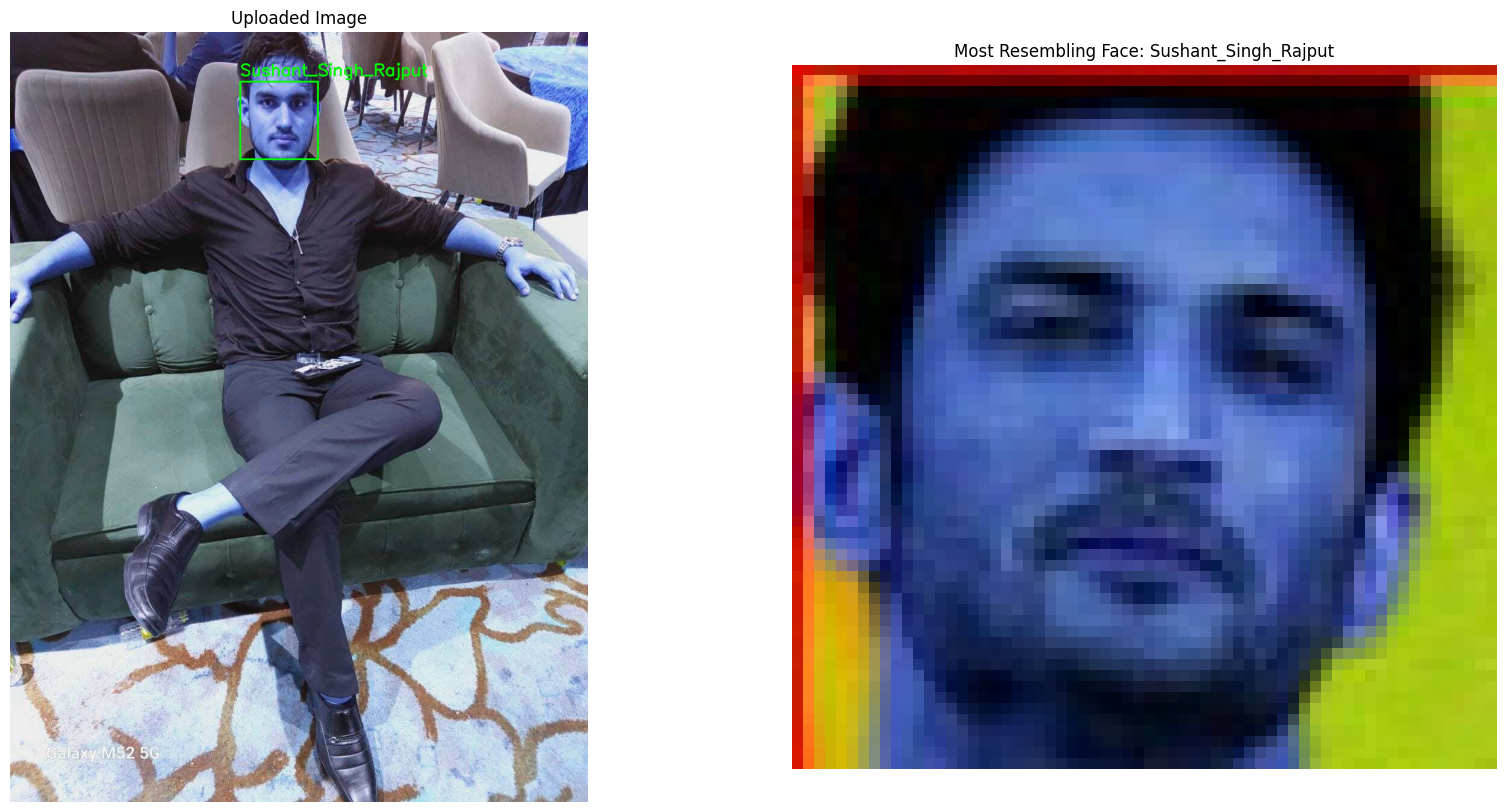

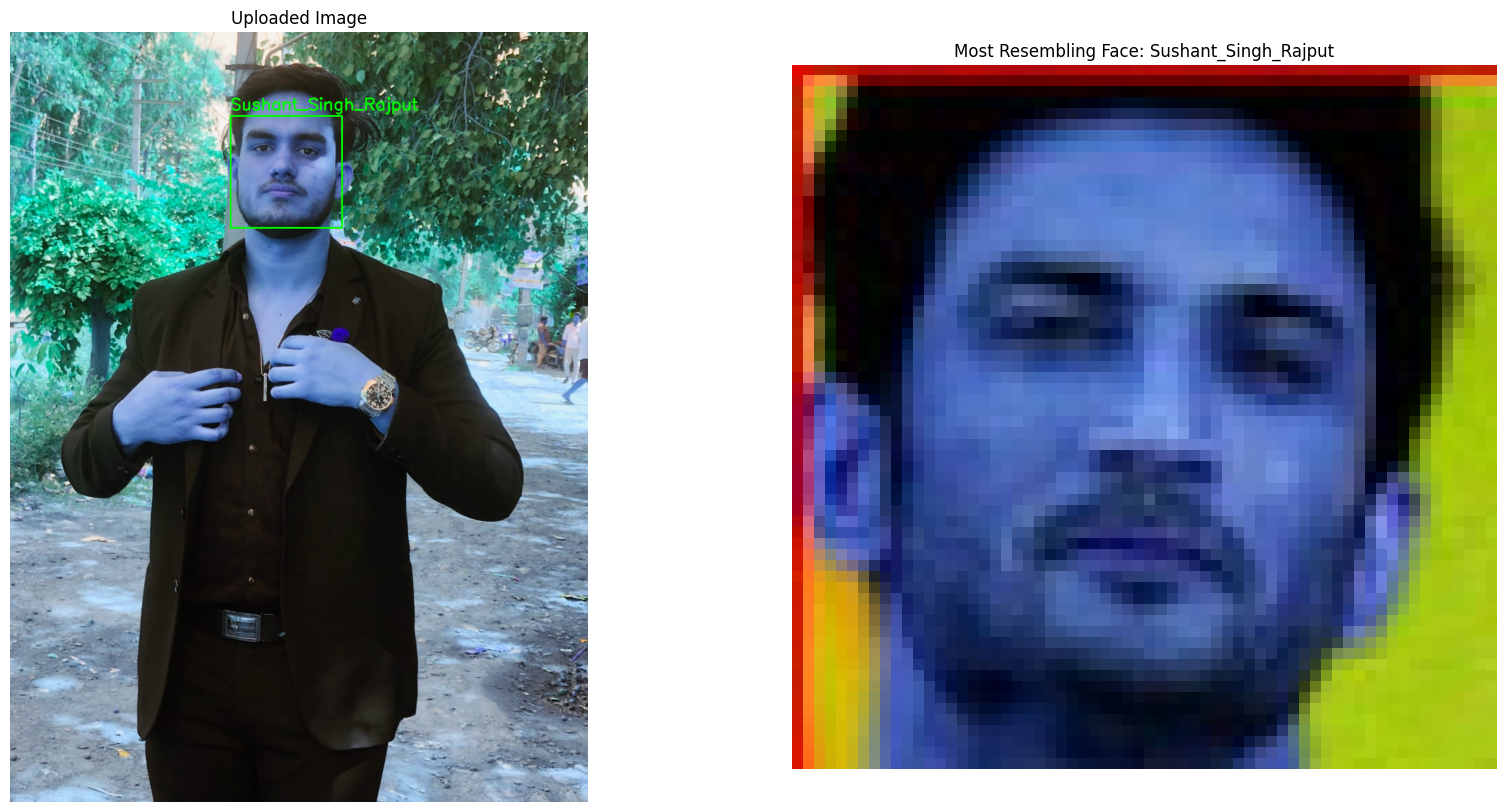

In [6]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import face_recognition
import cv2
import numpy as np
import pickle
from PIL import Image
import os

# Load the face encodings and labels
with open('face_encodings.pkl', 'rb') as f:
    known_face_encodings, known_face_labels = pickle.load(f)

def recognize_face(image_path):
    # Load the test image
    test_image = face_recognition.load_image_file(image_path)

    # Find all face locations and encodings in the test image
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    most_resembling_image = None  # To store the most resembling face image
    most_resembling_label = None  # To store the label of the most resembling face
    best_face_distance = float('inf')  # Initialize to a large value

    for face_encoding, face_location in zip(face_encodings, face_locations):
        # Compare the face encoding with the known face encodings
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        current_face_distance = face_distances[best_match_index]

        if current_face_distance < best_face_distance:
            best_face_distance = current_face_distance
            most_resembling_label = known_face_labels[best_match_index]
            most_resembling_image_path = f'/content/data/{most_resembling_label}/{os.listdir(f"/content/data/{most_resembling_label}")[0]}'
            most_resembling_image = face_recognition.load_image_file(most_resembling_image_path)
            most_resembling_image = cv2.cvtColor(most_resembling_image, cv2.COLOR_BGR2RGB)

        # Draw a rectangle around the face
        top, right, bottom, left = face_location
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)

        # Label the face
        label = most_resembling_label if most_resembling_label else "Unknown"
        cv2.putText(test_image, label, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert the test image to RGB format for display
    rgb_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Display the test image and most resembling face image side by side
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Show the uploaded test image
    ax[0].imshow(rgb_test_image)
    ax[0].set_title('Uploaded Image')
    ax[0].axis('off')

    if most_resembling_image is not None:
        ax[1].imshow(most_resembling_image)
        ax[1].set_title(f'Most Resembling Face: {most_resembling_label}')
    else:
        ax[1].text(0.5, 0.5, 'No matching face found', ha='center', va='center', fontsize=15)
        ax[1].set_title('Most Resembling Face')

    ax[1].axis('off')
    plt.show()

# Create a file upload button
upload_button = widgets.FileUpload(accept='.jpg, .jpeg, .png', multiple=False)
display(upload_button)

def on_upload_change(change):
    # Get the uploaded file
    uploaded_file = list(upload_button.value.values())[0]
    content = uploaded_file['content']

    # Save the uploaded file to a temporary location
    temp_image_path = '/content/temp_image.jpg'
    with open(temp_image_path, 'wb') as f:
        f.write(content)

    # Recognize the face in the uploaded image
    recognize_face(temp_image_path)

# Bind the function to the upload button
upload_button.observe(on_upload_change, names='value')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
